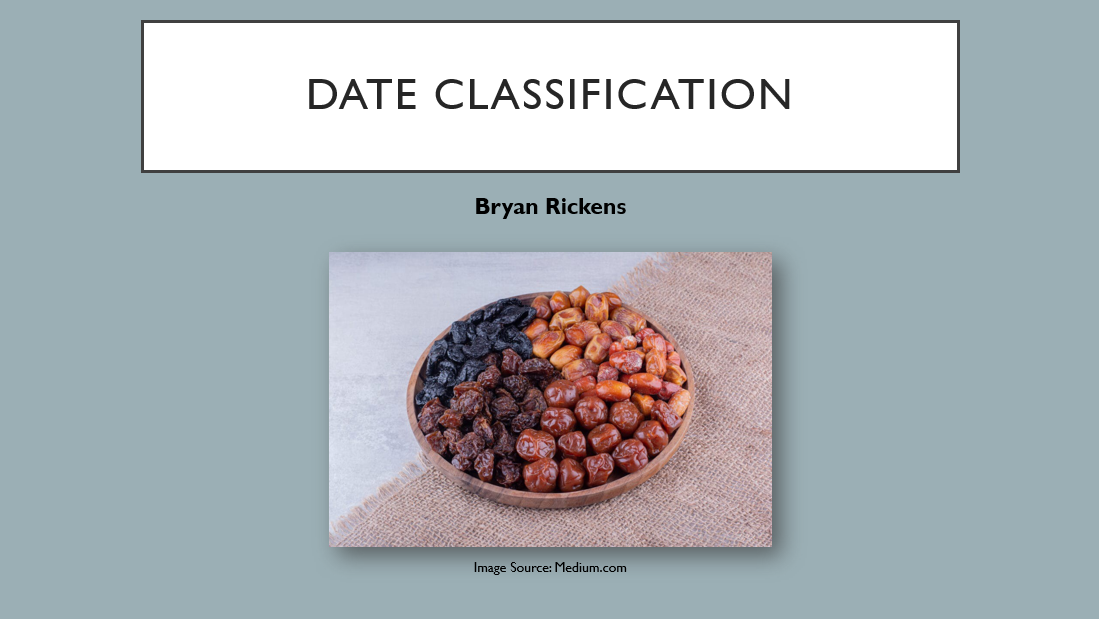

# Table of Contents:

# 1) Pre-Processing & Visualization

# 2) Logistic Regression

# 3) K-Nearest Neighbors

# 4) Decision Tree

# 5) Support Vector Machine

# 6) Conclusion

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

## 1) Pre-Processing and Visualization 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/BryanRickens/Portfolio/main/Date_Fruit_Datasets.csv')

### Let's begin by looking at the features and any possible null values

In [3]:
# Examine the columns and possible missing values
# We see that there are none
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

### Let's see both how many different classes there are as well as how many of each kind.

In [4]:
df.Class.value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

### Since it's not an even distriubtion between classes, let's visualize this.

Text(0.5, 1.0, 'Frequency of Class Types')

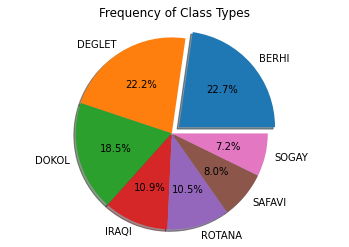

In [5]:
# Let's visualize this class frequency

class_count = df.Class.value_counts().to_list()
class_title = np.sort(df.Class.unique())

# Simple Pie Chart
fig, ax = plt.subplots()
ax.pie(class_count, explode = (0.1,0,0,0,0,0,0), shadow = True, labels = class_title, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Frequency of Class Types')



### Next, let's visualize the mean value for each feature between classes. Let's sort the columns by lowest mean so we can easily split them and have graphs of similar value ranges each time.

In [6]:
# Sorting by mean value
data = df.drop(columns=['Class'])
data = data.reindex(data.mean().sort_values().index, axis = 1)

In [7]:
# The new column order
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EntropyRR      898 non-null    float64
 1   EntropyRG      898 non-null    int64  
 2   EntropyRB      898 non-null    int64  
 3   SHAPEFACTOR_2  898 non-null    float64
 4   SHAPEFACTOR_1  898 non-null    float64
 5   SkewRR         898 non-null    float64
 6   SkewRB         898 non-null    float64
 7   SkewRG         898 non-null    float64
 8   SHAPEFACTOR_3  898 non-null    float64
 9   EXTENT         898 non-null    float64
 10  ECCENTRICITY   898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  ROUNDNESS      898 non-null    float64
 13  SOLIDITY       898 non-null    float64
 14  SHAPEFACTOR_4  898 non-null    float64
 15  ASPECT_RATIO   898 non-null    float64
 16  KurtosisRB     898 non-null    float64
 17  KurtosisRR     898 non-null    float64
 18  KurtosisRG

In [8]:
# First, make a list of the sorted columns
cols = list(data)

# Now, split them into chunks
# (since there are 7 classes, we don't want graphs that are too loud)
col1 = cols[:3]
col2 = cols[3:5]
col3 = cols[5:9]
col4 = cols[9:12]
col5 = cols[12:15]
col6 = cols[15:19]
col7 = cols[19:22]
col8 = cols[22:25]
col9 = cols[25:28]
col10 = cols[28:32]
col11 = cols[32:33]

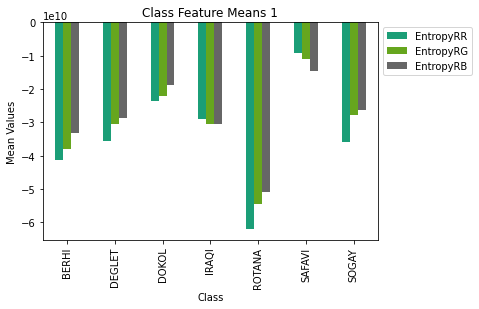

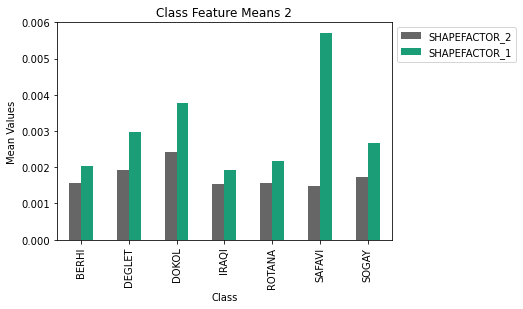

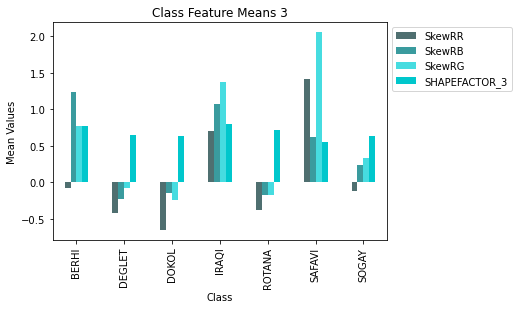

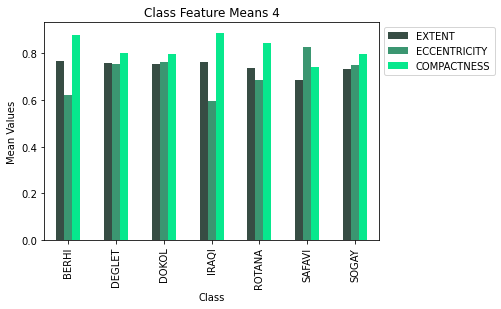

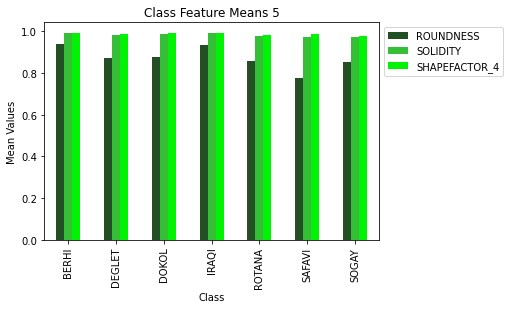

In [9]:
# We want to create DFs by grouping each class to the chunked feature mean
dfg = df.groupby(['Class'])[col1].mean()
# Plot and visualize feture means for each class
dfg = dfg.plot(kind='bar', title='Class Feature Means 1', ylabel='Mean Values',
         xlabel='Class', colormap="Dark2")
# Ensure the legend is outside the graph
dfg.legend(bbox_to_anchor=(1.0, 1.0)) 

# Repeat the process for each feature chunk

dfg1 = df.groupby(['Class'])[col2].mean()
dfg1 = dfg1.plot(kind='bar', title='Class Feature Means 2', ylabel='Mean Values',
         xlabel='Class',colormap="Dark2_r")
dfg1.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg2 = df.groupby(['Class'])[col3].mean()
dfg2 = dfg2.plot(kind='bar', title='Class Feature Means 3', ylabel='Mean Values',
         xlabel='Class',color=['#4f6f70','#3a9b9e','#46dce0','#00c7cc'])
dfg2.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg3 = df.groupby(['Class'])[col4].mean()
dfg3 = dfg3.plot(kind='bar', title='Class Feature Means 4', ylabel='Mean Values',
         xlabel='Class', color=['#374d44','#3b9671','#07e88d'])
dfg3.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg4 = df.groupby(['Class'])[col5].mean()
dfg4 = dfg4.plot(kind='bar', title='Class Feature Means 5', ylabel='Mean Values',
         xlabel='Class', color = ['#234f24','#34bf37','#00f205'])
dfg4.legend(bbox_to_anchor=(1.0, 1.0)) 



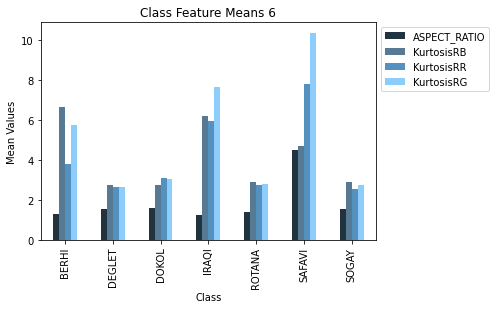

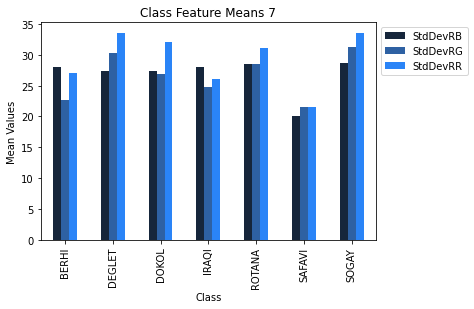

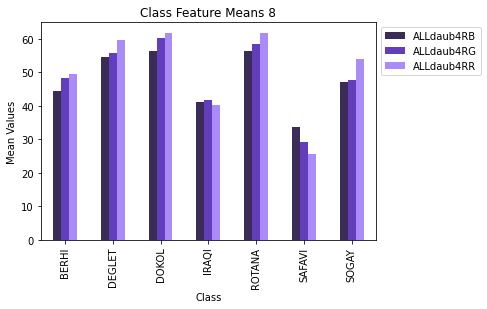

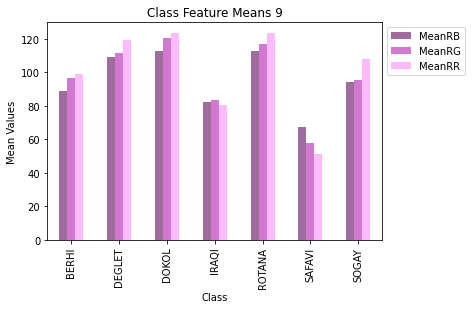

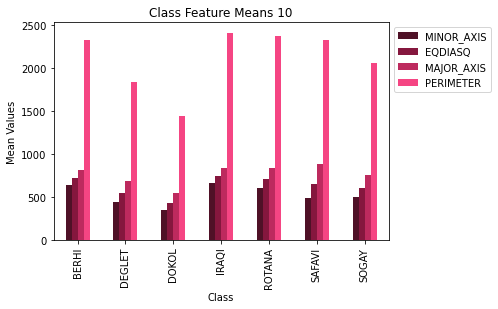

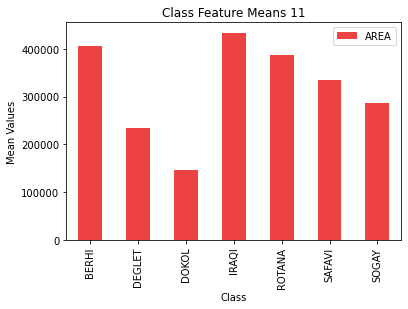

In [10]:
# Same as before, new cell for next half just for clarity

dfg5 = df.groupby(['Class'])[col6].mean()
dfg5 = dfg5.plot(kind='bar', title='Class Feature Means 6', ylabel='Mean Values',
         xlabel='Class', color = ['#223340','#567994','#5491bf','#8dcdfc'])
dfg5.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg6 = df.groupby(['Class'])[col7].mean()
dfg6 = dfg6.plot(kind='bar', title='Class Feature Means 7', ylabel='Mean Values',
         xlabel='Class', color = ['#16263b','#2e61a3','#2a84f7'])
dfg6.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg7 = df.groupby(['Class'])[col8].mean()
dfg7 = dfg7.plot(kind='bar', title='Class Feature Means 8', ylabel='Mean Values',
         xlabel='Class', color = ['#392d57','#623ebd','#a98cf5'])
dfg7.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg8 = df.groupby(['Class'])[col9].mean()
dfg8 = dfg8.plot(kind='bar', title='Class Feature Means 9', ylabel='Mean Values',
         xlabel='Class', color = ['#9e6d9d','#d179cf','#fcbbfb'])
dfg8.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg9 = df.groupby(['Class'])[col10].mean()
dfg9 = dfg9.plot(kind='bar', title='Class Feature Means 10', ylabel='Mean Values',
         xlabel='Class', color = ['#4f1127','#85173e','#bd2a5e','#f54583'])
dfg9.legend(bbox_to_anchor=(1.0, 1.0)) 

dfg10 = df.groupby(['Class'])[col11].mean()
dfg10= dfg10.plot(kind='bar', title='Class Feature Means 11', ylabel='Mean Values',
         xlabel='Class', color = ['#ed4242'])
dfg10.legend(bbox_to_anchor=(1.0, 1.0)) 

## 2) Logistic Regression

###  Now that we can get a sense of what distinguishes the classes from another, let's begin by buidling various classification models. 


Logistic Regression Report

              precision    recall  f1-score   support

       BERHI       1.00      0.95      0.97        20
      DEGLET       0.88      0.76      0.81        29
       DOKOL       0.92      0.98      0.95        61
       IRAQI       0.95      0.95      0.95        22
      ROTANA       0.92      0.96      0.94        50
      SAFAVI       1.00      0.98      0.99        60
       SOGAY       0.89      0.89      0.89        28

    accuracy                           0.94       270
   macro avg       0.94      0.93      0.93       270
weighted avg       0.94      0.94      0.94       270



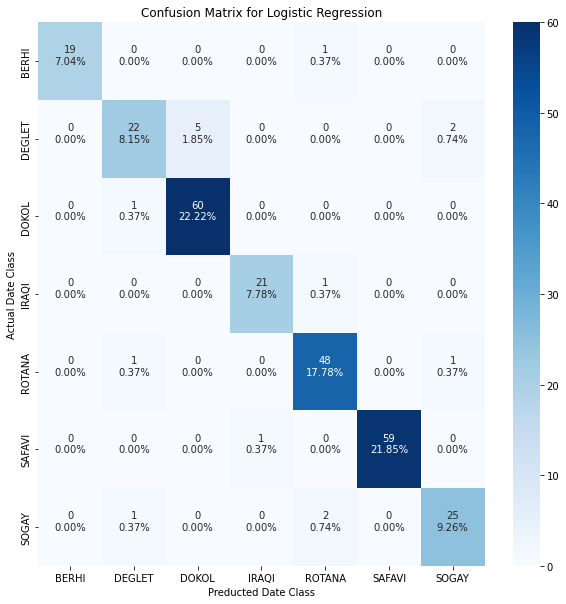

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model = LogisticRegression(max_iter=1000)

#We need to scale the feature values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# We need to encode Class
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

# Split our features and our Class values
X = df.drop(columns=['Class'])
y = df['Class']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 1, stratify=y)

# Train model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate effectiveness 
from sklearn.metrics import classification_report

print('Logistic Regression Report\n')
print(classification_report(y_test,y_pred,target_names = class_title))
LRscore = model.score(X_test, y_test)

# Use a confusion matrix to visualize the effectiveness 
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (7 x 7 since 7 classes)
labels = np.asarray(labels).reshape(7,7)

# Ensure the plot is readable 
plt.figure(figsize = (10,10))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')
ax.set_title('Confusion Matrix for Logistic Regression')
ax.set_xlabel('Preducted Date Class')
ax.set_ylabel('Actual Date Class')
ax.xaxis.set_ticklabels(class_title)
ax.yaxis.set_ticklabels(class_title)
plt.show()

### As we can see both from the simple accuracy score as well as from the more detailed confusion matrix, logistic regression did pretty well at classifying the dates accurately. 

## 3) K-Nearest Neighbors

Fitting 10 folds for each of 49 candidates, totalling 490 fits
Best neighbor value:  {'n_neighbors': 21}
K-Nearest Neighbors Report

              precision    recall  f1-score   support

       BERHI       1.00      0.70      0.82        20
      DEGLET       0.83      0.52      0.64        29
       DOKOL       0.88      0.98      0.93        61
       IRAQI       0.88      0.95      0.91        22
      ROTANA       0.86      0.96      0.91        50
      SAFAVI       1.00      1.00      1.00        60
       SOGAY       0.77      0.82      0.79        28

    accuracy                           0.89       270
   macro avg       0.89      0.85      0.86       270
weighted avg       0.89      0.89      0.89       270



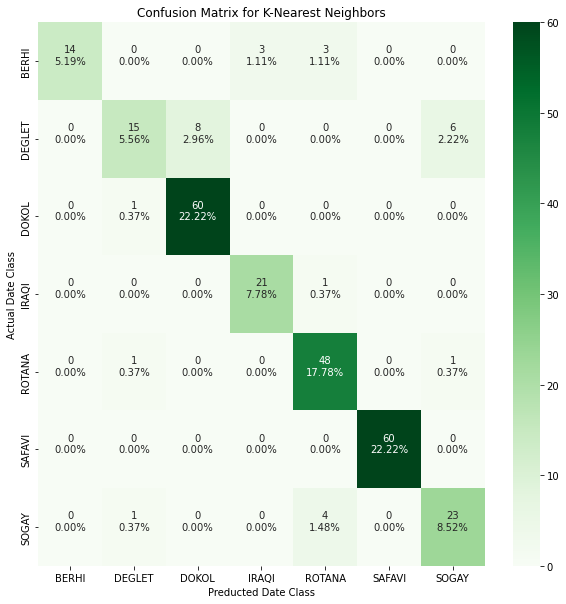

In [12]:
# Let's try KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

# Get our X and Y
X = df.drop(columns=['Class'])
y = df['Class']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 1, stratify=y)

# Get a list of possible neighbor values
n = list(range(1,50))

# GridSearchCV will crossvalidate all possible neighbor values and pick the best one    
param_grid = dict(n_neighbors = n)
gscv = GridSearchCV(knn,param_grid,cv=10, scoring = 'accuracy', return_train_score = False, verbose = 1)
model = gscv.fit(X_train,y_train)
print("Best neighbor value: ", model.best_params_)
y_pred = model.predict(X_test)
KNNscore = model.score(X_test, y_test)

print('K-Nearest Neighbors Report\n')
print(classification_report(y_test,y_pred,target_names = class_title))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (7 x 7 since 7 classes)
labels = np.asarray(labels).reshape(7,7)

# Ensure the plot is readable 
plt.figure(figsize = (10,10))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Greens')
ax.set_title('Confusion Matrix for K-Nearest Neighbors')
ax.set_xlabel('Preducted Date Class')
ax.set_ylabel('Actual Date Class')
ax.xaxis.set_ticklabels(class_title)
ax.yaxis.set_ticklabels(class_title)
plt.show()

### Although not as accurate as logistic regression, k-nearest neighbors still classified quite well.

## 4) Decision Tree

Decision Tree Report

              precision    recall  f1-score   support

       BERHI       0.56      0.50      0.53        20
      DEGLET       0.57      0.45      0.50        29
       DOKOL       0.89      0.90      0.89        61
       IRAQI       0.64      0.73      0.68        22
      ROTANA       0.86      0.86      0.86        50
      SAFAVI       0.95      0.95      0.95        60
       SOGAY       0.53      0.61      0.57        28

    accuracy                           0.78       270
   macro avg       0.71      0.71      0.71       270
weighted avg       0.78      0.78      0.78       270



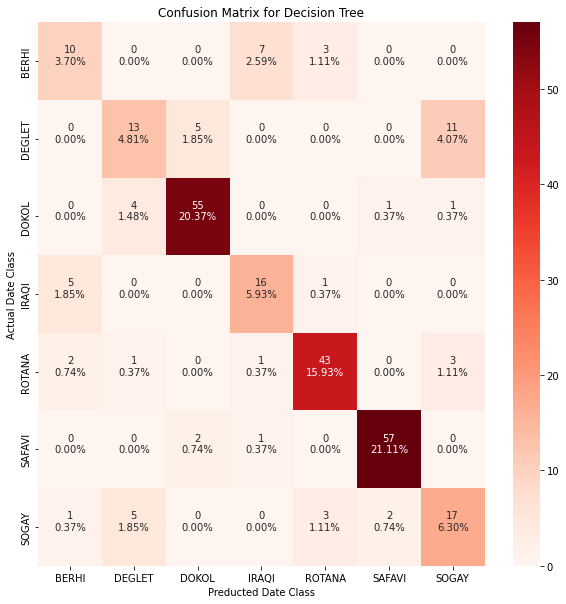

In [13]:
# Let's try a Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

# Get our X and Y
X = df.drop(columns=['Class'])
y = df['Class']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 1, stratify=y)

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Decision Tree Report\n')
print(classification_report(y_test,y_pred,target_names = class_title))

# Use a confusion matrix to visualize the effectiveness 
cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (7 x 7 since 7 classes)
labels = np.asarray(labels).reshape(7,7)

# Ensure the plot is readable 
plt.figure(figsize = (10,10))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Reds')
ax.set_title('Confusion Matrix for Decision Tree')
ax.set_xlabel('Preducted Date Class')
ax.set_ylabel('Actual Date Class')
ax.xaxis.set_ticklabels(class_title)
ax.yaxis.set_ticklabels(class_title)
plt.show()

### Since this one struggled moreso than the others, let's investigate further.

In [14]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
print('Decision Tree Training Score', accuracy_score(y_train_pred, y_train))
print('Decision Tree Testing Score', accuracy_score(y_pred, y_test))

Decision Tree Training Score 1.0
Decision Tree Testing Score 0.7814814814814814


### Let's begin by pre-pruning the tree and seeing if it fares better.

In [15]:
# Let's try some Pre-Pruning

# Params to hopefully diminish overfitting this time
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         }

dt = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
gscv = GridSearchCV(estimator = dt, param_grid = params, cv = 10)
gscv.fit(X_train, y_train)

model = gscv.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('Pre-Pruned Decision Tree Testing Score', accuracy_score(y_pred,y_test))



Pre-Pruned Decision Tree Testing Score 0.8407407407407408


### This definitely improved accuracy, but let's see if post-pruning works even better.
### We are going to evaluate the cost-complexity pruning path and its return alpha/impurity values. 

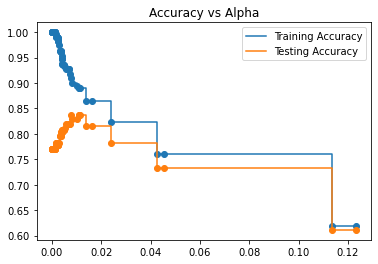

In [16]:
# Now Post-Pruning

dt = DecisionTreeClassifier(class_weight = 'balanced')

path = dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Model various Decision Trees for each alpha value
dts = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=1, ccp_alpha = ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)

# Lists for each accuracy
train_acc = []
test_acc = []

# Evaluate the accuracy of each model built/put into the list
for d in dts:
    y_train_pred = d.predict(X_train)
    y_pred = d.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_pred,y_test))
    
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas, train_acc, label = 'Training Accuracy', drawstyle = 'steps-post')
plt.plot(ccp_alphas, test_acc, label = 'Testing Accuracy', drawstyle = 'steps-post')
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

In [17]:
dtp = DecisionTreeClassifier(random_state=1, ccp_alpha = 0.0111)
dtp.fit(X_train, y_train)
y_pred = dtp.predict(X_test)

print('Testing Score: ', accuracy_score(y_pred,y_test))

Testing Score:  0.837037037037037


### Even though it sitll improved accuracy, pre-pruning performed the best. Let's run the pre-pruned model one last time and output its classification report and confusion matrix.

Pre-Pruned Decision Tree Report

              precision    recall  f1-score   support

       BERHI       0.65      0.75      0.70        20
      DEGLET       0.76      0.55      0.64        29
       DOKOL       0.90      0.93      0.92        61
       IRAQI       0.68      0.77      0.72        22
      ROTANA       0.96      0.88      0.92        50
      SAFAVI       0.95      0.95      0.95        60
       SOGAY       0.66      0.75      0.70        28

    accuracy                           0.84       270
   macro avg       0.79      0.80      0.79       270
weighted avg       0.85      0.84      0.84       270



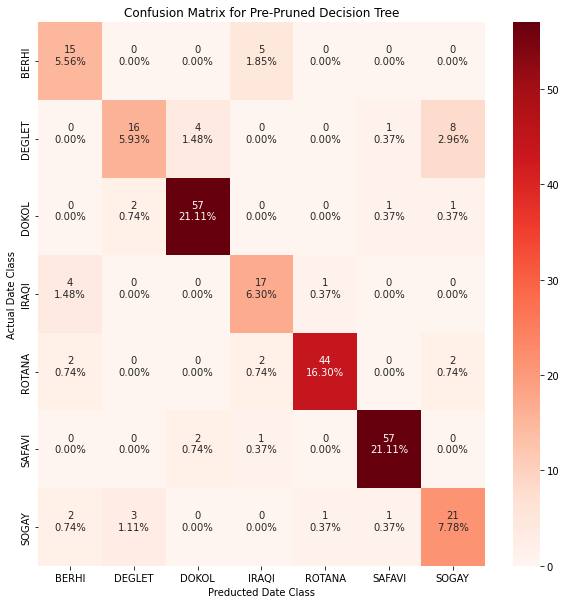

In [18]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2],
         }

dt = DecisionTreeClassifier(random_state = 0, class_weight = 'balanced')
gscv = GridSearchCV(estimator = dt, param_grid = params, cv = 10)
gscv.fit(X_train, y_train)

model = gscv.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
DTscore = model.score(X_test,y_test)
print('Pre-Pruned Decision Tree Report\n')
print(classification_report(y_test,y_pred,target_names = class_title))


cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (7 x 7 since 7 classes)
labels = np.asarray(labels).reshape(7,7)

# Ensure the plot is readable 
plt.figure(figsize = (10,10))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Reds')
ax.set_title('Confusion Matrix for Pre-Pruned Decision Tree')
ax.set_xlabel('Preducted Date Class')
ax.set_ylabel('Actual Date Class')
ax.xaxis.set_ticklabels(class_title)
ax.yaxis.set_ticklabels(class_title)
plt.show()

## 5) Support Vector Machine

Support Vector Machine Report

              precision    recall  f1-score   support

       BERHI       0.83      0.95      0.88        20
      DEGLET       0.92      0.79      0.85        29
       DOKOL       0.94      0.97      0.95        61
       IRAQI       1.00      0.91      0.95        22
      ROTANA       0.92      0.94      0.93        50
      SAFAVI       1.00      0.97      0.98        60
       SOGAY       0.77      0.82      0.79        28

    accuracy                           0.92       270
   macro avg       0.91      0.91      0.91       270
weighted avg       0.93      0.92      0.92       270



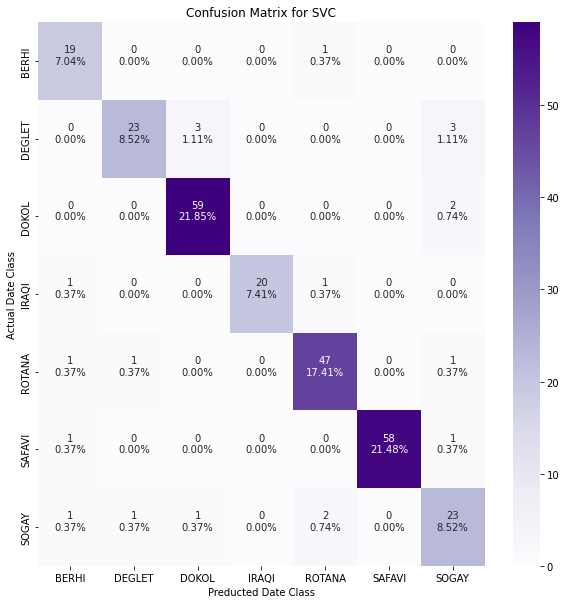

In [19]:
# Lastly, let's try a Support Vector Machine 
from sklearn.svm import SVC

model = SVC(kernel = 'linear')

# Get our X and Y
X = df.drop(columns=['Class'])
y = df['Class']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 1, stratify=y)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
SVCscore = model.score(X_test,y_test)
print('Support Vector Machine Report\n')
print(classification_report(y_test,y_pred,target_names = class_title))


cf_matrix = confusion_matrix(y_test,y_pred)

# Get the counts for each class
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

# Get the percentage  of each class 
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

# Assign the count/percentage as labels
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

# Reshape the labels to the correct size (7 x 7 since 7 classes)
labels = np.asarray(labels).reshape(7,7)

# Ensure the plot is readable 
plt.figure(figsize = (10,10))

# Plot using a seaborn heatmap
ax = sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Purples')
ax.set_title('Confusion Matrix for SVC')
ax.set_xlabel('Preducted Date Class')
ax.set_ylabel('Actual Date Class')
ax.xaxis.set_ticklabels(class_title)
ax.yaxis.set_ticklabels(class_title)
plt.show()


### Almost on par with logistic regression. 

### Understanding that SVCs seek to maximize the margin between separate classes, let's end by visualizing the cluster of points and imagining how the SVC may have distinguished between the classes.

### We will have to use Principle Component Analysis to reduce the features into a 2D space for this visualiation, so it won't be the same as the cluster space the SVC model used, but it's comporable enough for visual purposes.

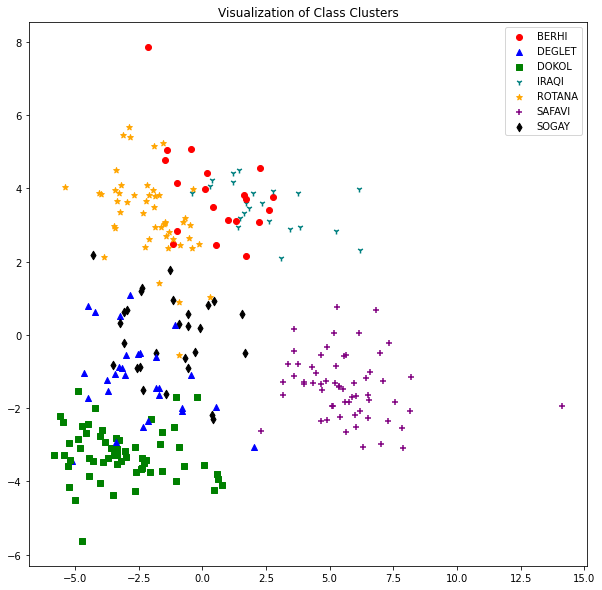

In [20]:
# Let's visualize the cluster of the testing split we've been using this whole time
from sklearn.decomposition import PCA

# Get our X and Y
X = df.drop(columns=['Class'])
y = df['Class']

# Transform X and Encode Y
X = sc.fit_transform(X)
y = enc.fit_transform(y)

# Make our testing and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 1, stratify=y)

# We use sckit-learn's PCA feature to reduce the dimensionality to 2D so we can visualize
pca = PCA(n_components = 2).fit_transform(X_test)
plt.figure(figsize = (10,10))

# Go through each class and assign it a unqiue scatterplot
for i in range(0,pca.shape[0]):
    if y_test[i] == 0:
        c1 = plt.scatter(pca[i,0], pca[i,1], c = 'red')
    elif y_test[i] == 1:
        c2 = plt.scatter(pca[i,0], pca[i,1], c = 'blue', marker = '^')
    elif y_test[i] == 2:
        c3 = plt.scatter(pca[i,0], pca[i,1], c = 'green', marker = 's')    
    elif y_test[i] == 3:
        c4 = plt.scatter(pca[i,0], pca[i,1], c = 'teal', marker = '1')
    elif y_test[i] == 4:
        c5 = plt.scatter(pca[i,0], pca[i,1], c = 'orange', marker = '*')
    elif y_test[i] == 5:
        c6 = plt.scatter(pca[i,0], pca[i,1], c = 'purple', marker = '+')
    elif y_test[i] == 6:
        c7 = plt.scatter(pca[i,0], pca[i,1], c = 'black', marker = 'd')

plt.legend([c1,c2,c3,c4,c5,c6,c7], class_title) 
plt.title('Visualization of Class Clusters')
plt.show()
        

### Seeing the distinct clusters, it's understandable why not only the SVC model but our other models such as logistic regression and k-nearest neighbors (linearly separable and measurable via proximity).

## 6) Conlusion

### Let's end by comparing the scores between our models.

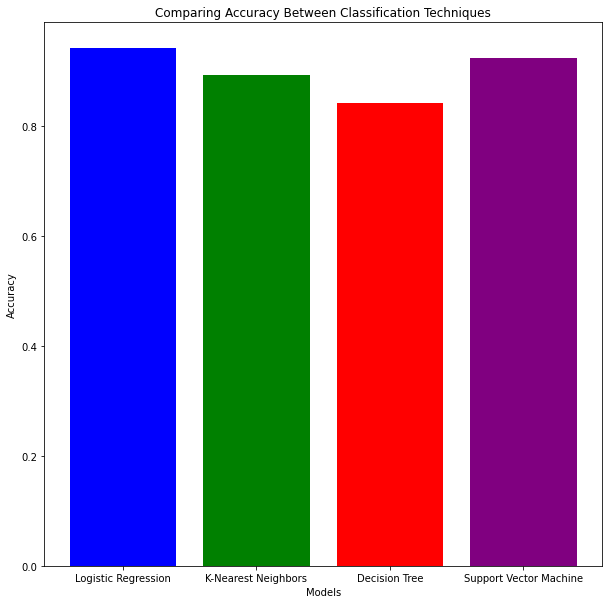

In [21]:
x = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree','Support Vector Machine']
y = [LRscore,KNNscore, DTscore, SVCscore]


plt.figure(figsize = (10,10))
plt.bar(x, y, color = ['blue','green','red','purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparing Accuracy Between Classification Techniques")
plt.show()


### As we can conclude, thank to the purity of the given dataset, all of our classification models performed well with logstic regression and SVC performing the best.